In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.plotly as plot

In [2]:
#df=pd.concat([df,df1,df2])
#df.to_csv("tweets.csv")
#df.columns

In [3]:
df=pd.read_csv("tweets.csv")
df.columns

Index(['Unnamed: 0', 'status_id', 'user_id', 'created_at', 'screen_name',
       'text', 'source', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favourites_count',
       'retweet_count', 'country_code', 'place_full_name', 'place_type',
       'followers_count', 'friends_count', 'account_lang',
       'account_created_at', 'verified', 'lang'],
      dtype='object')

In [4]:
df.corr()

,Unnamed: 0,status_id,user_id,reply_to_status_id,reply_to_user_id,is_quote,is_retweet,favourites_count,retweet_count,followers_count,friends_count,account_lang,verified
Unnamed: 0,1.000000,-0.081882,0.007689,-0.040601,-0.040744,0.016687,NaN,-0.066253,-0.000242,0.008564,-0.020576,NaN,-0.015222
status_id,-0.081882,1.000000,0.039550,0.120461,0.122574,-0.009878,NaN,-0.000739,-0.009229,0.003985,-0.019666,NaN,-0.017581
user_id,0.007689,0.039550,1.000000,0.046987,0.345264,-0.074567,NaN,-0.039669,-0.051577,-0.045951,-0.051508,NaN,-0.128092
reply_to_status_id,-0.040601,0.120461,0.046987,1.000000,0.040262,0.003268,NaN,0.016884,0.006098,-0.001875,0.023473,NaN,0.006345
reply_to_user_id,-0.040744,0.122574,0.345264,0.040262,1.000000,-0.032358,NaN,0.088432,0.015593,-0.041678,0.050443,NaN,-0.043615
is_quote,0.016687,-0.009878,-0.074567,0.003268,-0.032358,1.000000,NaN,0.047065,-0.012954,-0.004632,0.003672,NaN,0.012979
is_retweet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favourites_count,-0.066253,-0.000739,-0.039669,0.016884,0.088432,0.047065,NaN,1.000000,0.074761,0.008871,0.101485,NaN,0.015422
retweet_count,-0.000242,-0.009229,-0.051577,0.006098,0.015593,-0.012954,NaN,0.074761,1.000000,0.339052,0.011661,NaN,0.219963
followers_count,0.008564,0.003985,-0.045951,-0.001875,-0.041678,-0.004632,NaN,0.008871,0.339052,1.000000,0.028572,NaN,0.218774


In [5]:
df.reset_index(drop=True)
df=df["text"]
df.head()

0    अरे कोई इन जाहिल गवारों को समझाए अगर ये (ईश्वर...
1    #जबलपुर 9 साल का मासूम कोरोना पॉजिटिव है। अकेल...
2    Interesting Read. A Four point strategy beyond...
3    #iamvipinsahu @iamvipinsahu #vipin_sahu #vipin...
4    (#COVID19) #कोरोना वैश्विक महामारी से संबंधित ...
Name: text, dtype: object

In [6]:
df.reset_index(drop=True,inplace=True)
df=pd.DataFrame(df)

In [7]:
df.head(11)

,text
0,अरे कोई इन जाहिल गवारों को समझाए अगर ये (ईश्वर...
1,#जबलपुर 9 साल का मासूम कोरोना पॉजिटिव है। अकेल...
2,Interesting Read. A Four point strategy beyond...
3,#iamvipinsahu @iamvipinsahu #vipin_sahu #vipin...
4,(#COVID19) #कोरोना वैश्विक महामारी से संबंधित ...
5,@Imamofpeace China sneezed - world freezed.\n\...
6,"The poor in India are starving, the public is ..."
7,We are not stuck at home we are safe at home.....
8,इटली में अबतक 1000 फादर मर चुके हैं और ये लोग ...
9,गौर करोगे तो फर्क दिखेगा...\nपत्थर होते होंगे ...


In [8]:
pip install TextBlob

     |████████████████████████████████| 636 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 661 kB 17.8 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.6 MB/s  eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434678 sha256=62e2a53a1a527ef86fee56d817f8d3ef917ae8a08f4b0a3014fd67b78066ac8c
  Stored in directory: /home/jovyan/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [9]:
from textblob import TextBlob

In [10]:
l=[]
def analyzer(input_text):
    
    score = TextBlob(input_text).sentiment.polarity
   
    return score


In [11]:
import re
def clean(text):
        pattern = re.sub("https://t.co/", "", text)
        return pattern

In [12]:
df['textblob_sent'] = df["text"].apply(analyzer)
df["text"]=df["text"].apply(clean)
df.head(1)

,text,textblob_sent
0,अरे कोई इन जाहिल गवारों को समझाए अगर ये (ईश्वर...,0.0


In [13]:
neu=0
pos=0
neg=0
for i in df["textblob_sent"]:
    if i<0:
        neu+=1
    if i==0:
        pos+=1
    else:
        neg+=1

In [15]:
x=["positive","negitive","nuteral"]
tot=pos+neg+neu
pos_per=(pos/tot)*100
neg_per=(neg/tot)*100
neu_per=(neu/tot)*100
print(pos_per,neg_per,neu_per)

53.609239653512994 37.15110683349375 9.239653512993263


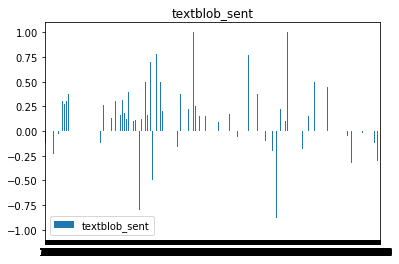

In [16]:
axes = df.plot.bar(rot=0, subplots=True)

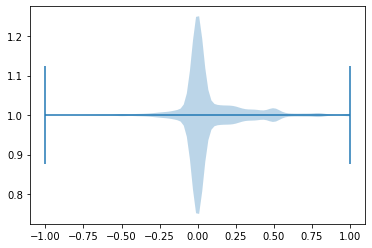

In [17]:
fig, ax = plt.subplots()
ax.violinplot(df["textblob_sent"], vert=False)
plt.show()

In [18]:
pos,neg,neu

(4456, 3088, 768)

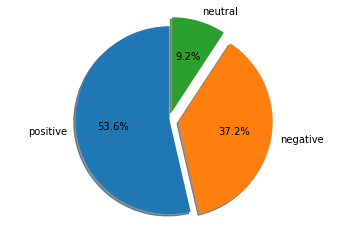

In [22]:
labels="positive","negative","neutral"
sizes=[pos_per,neg_per,neu_per]
explode = (0, 0.1, 0.1)
fig,ax=plt.subplots()
ax.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()       

Text(0.5, 1.0, 'Sentiment bar chart')

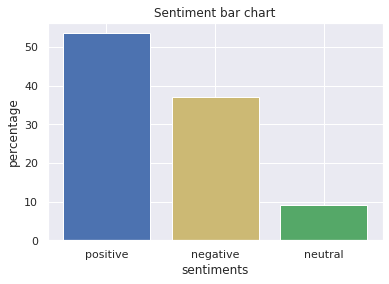

In [46]:
plt.bar(labels,sizes,align="center",alpha=1,color=["b","y","g"])
plt.ylabel('percentage')
plt.xlabel("sentiments")
plt.title('Sentiment bar chart')

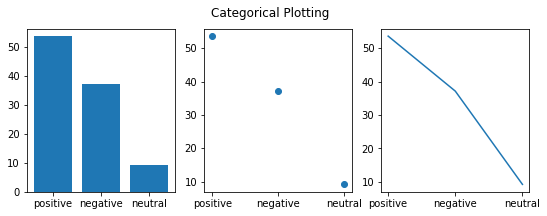

In [24]:

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(labels, sizes)
plt.subplot(132)
plt.scatter(labels, sizes)
plt.subplot(133)
plt.plot(labels, sizes)
plt.suptitle('Categorical Plotting')
plt.show()


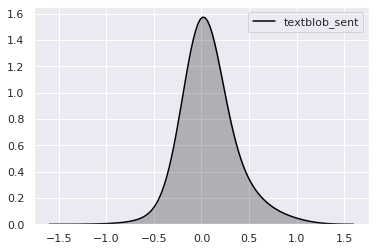

In [43]:
import seaborn as sns
for col in 'x':
    sns.kdeplot(df["textblob_sent"], shade=True,color="black",bw=.20)

In [48]:
text = " ".join(review for review in df["text"])
text

'अरे कोई इन जाहिल गवारों को समझाए अगर ये (ईश्वर के दूत/खुदा के बन्दे) नाराज हो गए तो याद रखना फिर सड़ते रहना घर के अंदर, कोई खुदा नहीं आएगा तुम्हें बचाने\n#Muradabad \n#COVID19 \n#IndiaFightsCorona fBBy4VD2wd #जबलपुर 9 साल का मासूम कोरोना पॉजिटिव है। अकेले हॉस्पिटल जा रहे बच्चे पर क्या बीत रही होगी। और अपने कलेजे के टुकड़े को इस तरह अकेले जाता देख परिवार पर क्या बीत रही होगी, ये बीमारी ही ऐसी है, अपने भी साथ छोड़ने पर मजबूर हैं। \n\n#PleaseStayHome \n#Covid19\n\n🙏#Getwellsoon🙏🙏 YyYMQLMKLT Interesting Read. A Four point strategy beyond the #covid19 Lockdown and suggestive yet detailed measures which needs to be developed, and will require sustained and empathetic communication by governments, businesses and community leaders. vBCQGkxISJ #iamvipinsahu @iamvipinsahu #vipin_sahu #vipin #विपिन #StayHomeStaySafe #TwitterTrends PX9E5mSEch (#COVID19) #कोरोना वैश्विक महामारी से संबंधित महत्वपूर्ण सूचना:-  \n"तोड़ देंगे तुम्हारे शरीर का कोना-कोना, मगर होने ना देंगे तुमको कोरोना" । \nइसलिए घर में

In [29]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


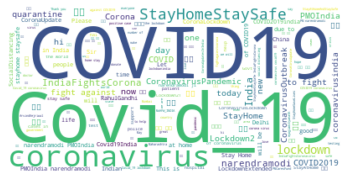

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(["thi","00","ha","amp","OO","@"])


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

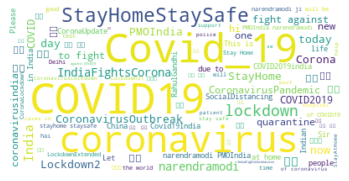

In [31]:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

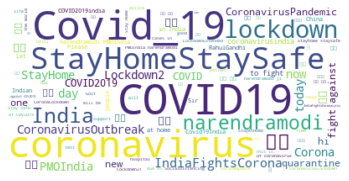

In [32]:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


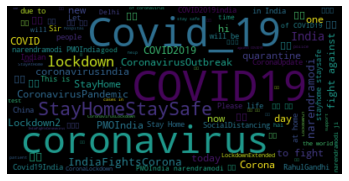

In [33]:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

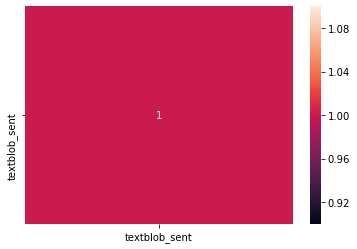

In [35]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

In [38]:
import seaborn as sns
sns.set()

In [41]:
sns

<module 'seaborn' from '/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/__init__.py'>